In [164]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math

# Input data files are available in the read-only '../input/' directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using 'Save & Run All' 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anz-synthesised-transaction-dataset/anz.csv


In [165]:
#Reading Data
data = pd.read_csv('../input/anz-synthesised-transaction-dataset/anz.csv')

In [166]:
# Number of Raws and columns
data.shape

(12043, 23)

In [167]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# Data Cleaning

In [168]:
# number of unique items in each colum

col = data.columns
for c in col:
    print(data[c].nunique(), "unique items in",c)

2 unique items in status
2 unique items in card_present_flag
3 unique items in bpay_biller_code
100 unique items in account
1 unique items in currency
100 unique items in long_lat
6 unique items in txn_description
5725 unique items in merchant_id
1 unique items in merchant_code
80 unique items in first_name
12006 unique items in balance
91 unique items in date
2 unique items in gender
33 unique items in age
1609 unique items in merchant_suburb
8 unique items in merchant_state
9442 unique items in extraction
4457 unique items in amount
12043 unique items in transaction_id
1 unique items in country
100 unique items in customer_id
2703 unique items in merchant_long_lat
2 unique items in movement


In [169]:
#checking null columns

data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [170]:
#checking if any column has 0 value in it 

col = data.columns
for c in col:
    print((data[c] == 0).sum(), ':', c)

0 : status
1523 : card_present_flag
0 : bpay_biller_code
0 : account
0 : currency
0 : long_lat
0 : txn_description
0 : merchant_id
883 : merchant_code
0 : first_name
0 : balance
0 : date
0 : gender
0 : age
0 : merchant_suburb
0 : merchant_state
0 : extraction
0 : amount
0 : transaction_id
0 : country
0 : customer_id
0 : merchant_long_lat
0 : movement


In [171]:
# Making separate columns for longitude and latitude 

data['longitude'] = data['long_lat'].str.split(' ', expand=True)[0]
data['latitude'] = data['long_lat'].str.split(' ', expand=True)[1]
# print(data['latitude'])

In [172]:
#checking data type of the columns

col = data.columns
for c in col:
    print(data[c].dtype, ':', c)

object : status
float64 : card_present_flag
object : bpay_biller_code
object : account
object : currency
object : long_lat
object : txn_description
object : merchant_id
float64 : merchant_code
object : first_name
float64 : balance
object : date
object : gender
int64 : age
object : merchant_suburb
object : merchant_state
object : extraction
float64 : amount
object : transaction_id
object : country
object : customer_id
object : merchant_long_lat
object : movement
object : longitude
object : latitude


In [173]:
#changing data type of few columns

data.latitude = data['latitude'].astype(float)
data.longitude = data['longitude'].astype(float)
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)

In [174]:
# Removing columns which gives no valuable analysis

empty = ['merchant_id', 'bpay_biller_code', 'merchant_code', 'long_lat',  'transaction_id']
data.drop(empty, axis = 1, inplace = True)

# Univariate and Bivariate Analysis

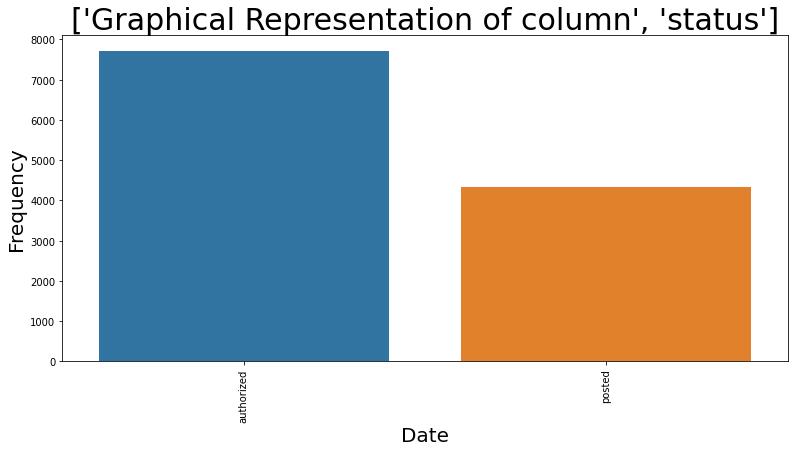

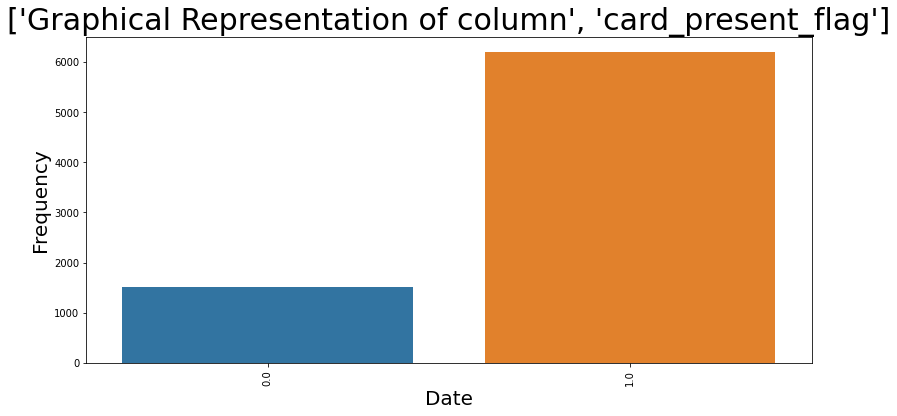

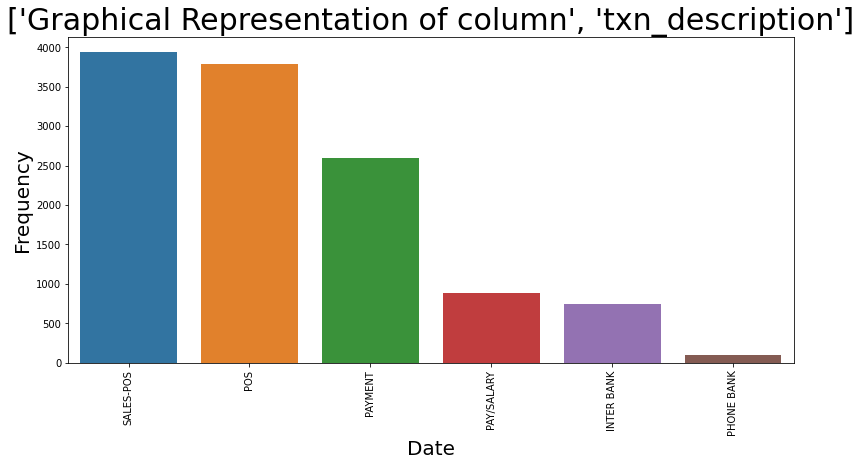

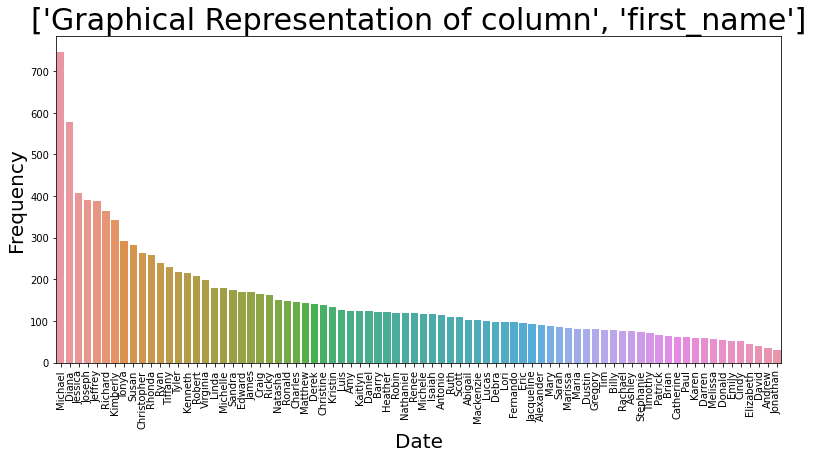

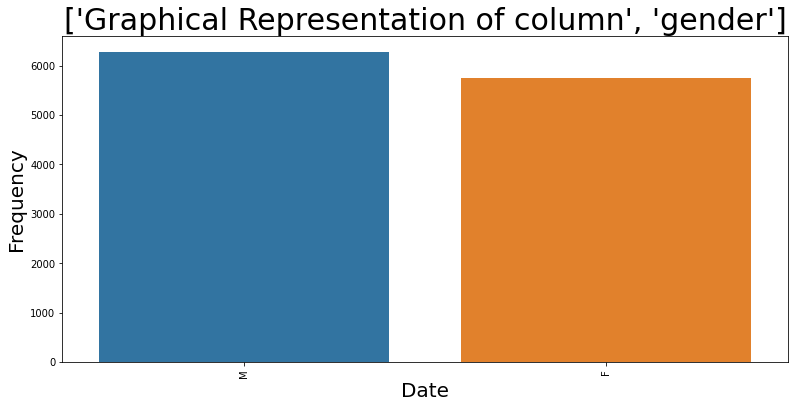

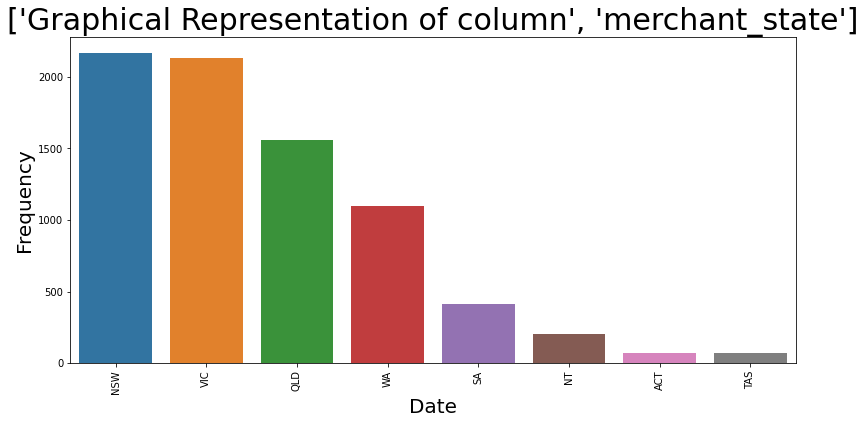

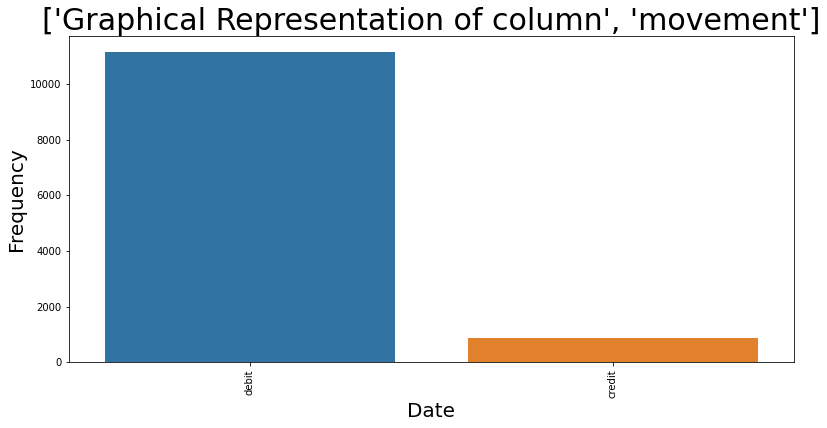

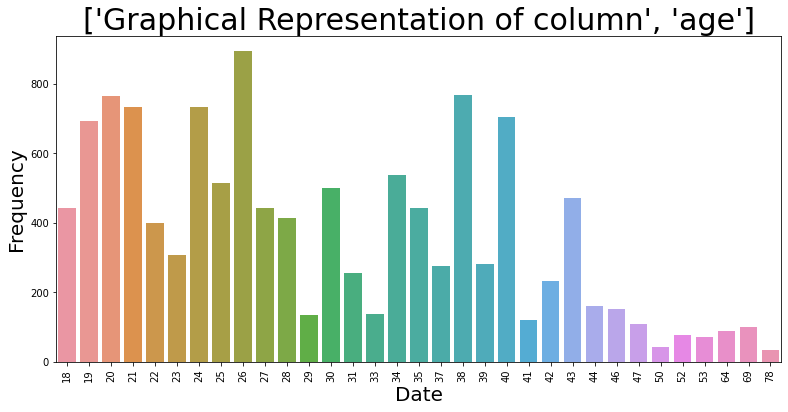

In [175]:
data.head(3)
col = ['status', 'card_present_flag', 'txn_description', 'first_name', 'gender', 'merchant_state', 'movement', 'age']

for c in col:
    x_axis = data[c].value_counts().index
    y_axis = data[c].value_counts().values
    plt.figure(figsize=(13,6))
    sns.barplot(x=x_axis, y=y_axis)
    plt.xticks(rotation=90) 
    plt.title(['Graphical Representation of column', c],fontsize = 30,color='black')
    plt.xlabel('Date', fontsize = 20)
    plt.ylabel('Frequency', fontsize =20)
    plt.show()

## Salary & Spending Analysis

Total Salary: 1676576.85
Total Spending: 586707.35


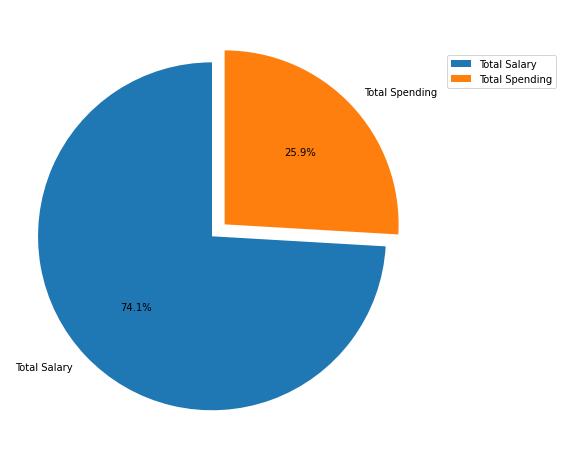

In [176]:
# Salary vs Spending

total_salary = data.amount[(data.movement == "credit")].sum() 
total_spending = data.amount[(data.movement == "debit")].sum()
print("Total Salary:",total_salary)
print("Total Spending:", total_spending)
pie = [total_salary, total_spending]
fig, ax = plt.subplots(figsize=(12,8))
label = ['Total Salary',
        'Total Spending']
explode = (0.1, 0)
ax.pie(pie, autopct="%.1f%%", labels =  label, explode = explode,startangle=90 )
ax.legend(frameon=True, bbox_to_anchor=(1,0.9))
plt.show()

Total Male Salary: 972920.6200000001
Total Male Spending: 320040.94999999995


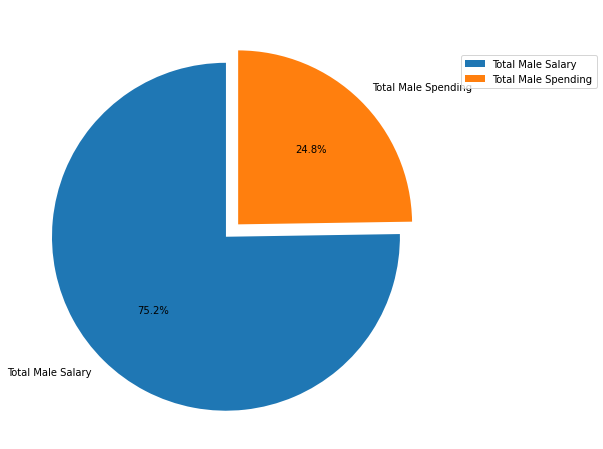

In [177]:
total_salary_male = data.amount[(data.movement == "credit") & (data.gender == 'M')].sum()
total_spending_male = data.amount[(data.movement == "debit") & (data.gender == 'M')].sum()
print('Total Male Salary:', total_salary_male)
print('Total Male Spending:',total_spending_male)
pie_male = [total_salary_male, total_spending_male]

plt.figure(figsize=(12,8))
label = ['Total Male Salary',
        'Total Male Spending']
explode = (0.1, 0)
plt.pie(pie_male, autopct="%.1f%%", labels =  label, explode = explode,startangle=90 )
plt.legend(frameon=True, bbox_to_anchor=(1,0.9))
plt.show()

Total Female Salary: 703656.23
Total Female Spending: 266666.4


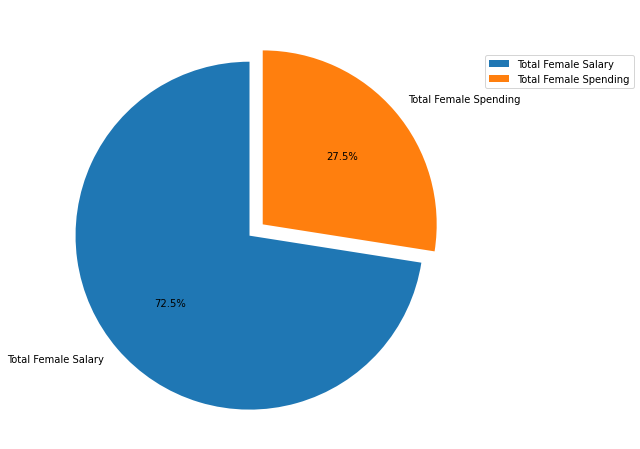

In [178]:
total_salary_female = data.amount[(data.movement == "credit") & (data.gender == 'F')].sum()
total_spending_female = data.amount[(data.movement == "debit") & (data.gender == 'F')].sum()
print('Total Female Salary:',total_salary_female)
print('Total Female Spending:',total_spending_female)
pie_female = [total_salary_female, total_spending_female]

plt.figure(figsize=(12,8))
label = ['Total Female Salary',
        'Total Female Spending']
explode = (0.1, 0)
plt.pie(pie_female, autopct="%.1f%%", labels =  label, explode = explode,startangle=90 )
plt.legend(frameon=True, bbox_to_anchor=(1,0.9))
plt.show()

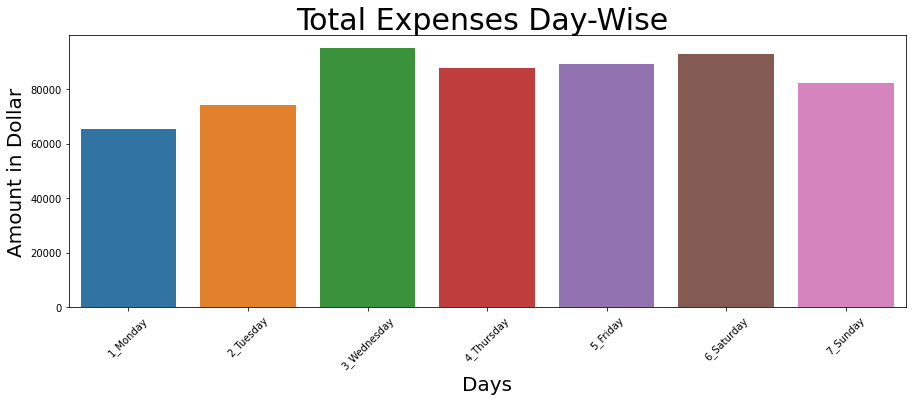

In [179]:
# Making separately column for days and months
data['day'] = data.date.dt.dayofweek
data['day'].replace({0: '1_Monday',1: '2_Tuesday',2: '3_Wednesday',3: '4_Thursday',4: '5_Friday',5: '6_Saturday',6: '7_Sunday'}, inplace = True)
data['month'] = data.date.dt.month

# Total Spending by days
salary_data = data[data.movement == "credit"] # Salary Data
spending_data = data[data.movement == "debit"] # spending Data

# Total Daily Expenses
daily_amount_spent = spending_data.groupby('day')['amount'].sum().reset_index()
daily_amount_spent.sort_values(by = 'day')

fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = daily_amount_spent.day, y = daily_amount_spent.amount, ax= ax)
plt.title('Total Expenses Day-Wise ',fontsize = 30,color='black')
plt.xlabel('Days', fontsize = 20)
plt.ylabel('Amount in Dollar', fontsize =20)
plt.xticks(rotation = 45)
plt.show()


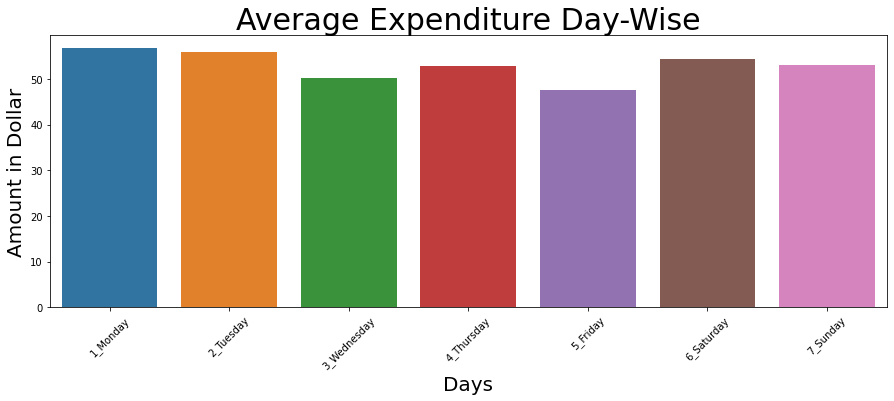

In [180]:
# Average Daily Expenses
daily_amount_spent = spending_data.groupby('day')['amount'].mean().reset_index()
daily_amount_spent.sort_values(by = 'day')

fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = daily_amount_spent.day, y = daily_amount_spent.amount, ax= ax)
plt.title('Average Expenditure Day-Wise',fontsize = 30,color='black')
plt.xlabel('Days', fontsize = 20)
plt.ylabel('Amount in Dollar', fontsize =20)
plt.xticks(rotation = 45)
plt.show()

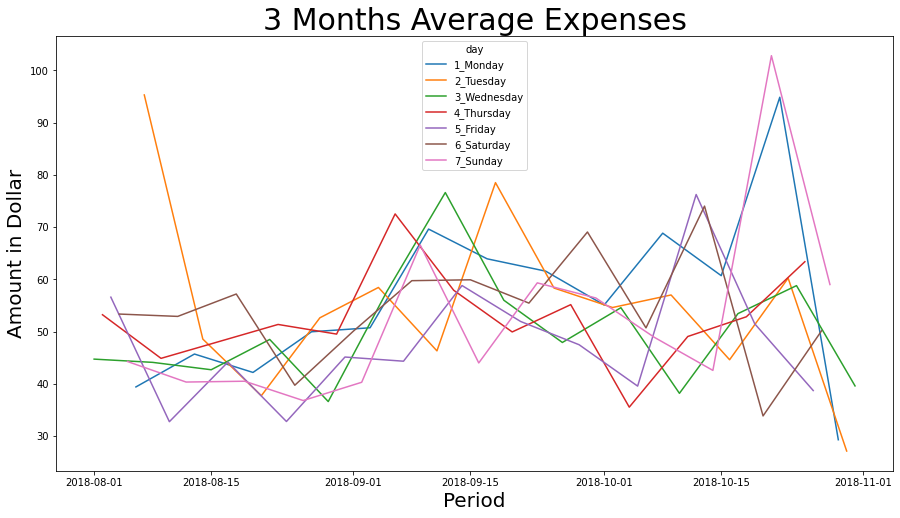

In [181]:
daily_amount_spent_line = spending_data.groupby(['day', 'date'])['amount'].mean().reset_index()

# daily_amount_spent.sort_values(by = 'day')
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x = daily_amount_spent_line.date, y = daily_amount_spent_line.amount, hue = daily_amount_spent_line.day, ax= ax)
plt.title('3 Months Average Expenses',fontsize = 30,color='black')
plt.xlabel('Period', fontsize = 20)
plt.ylabel('Amount in Dollar', fontsize =20)
plt.show()

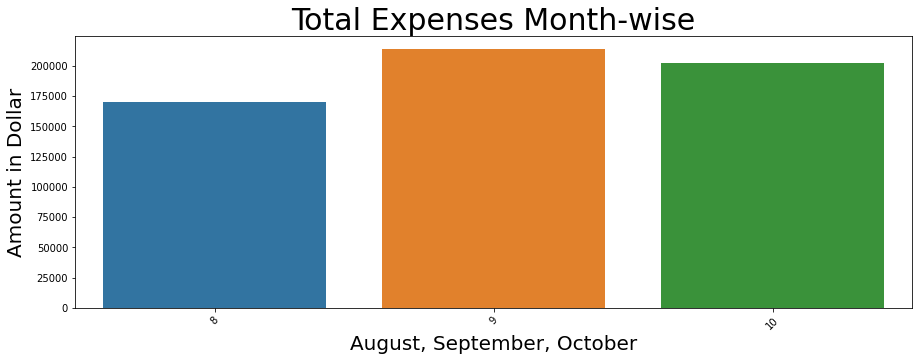

In [182]:

spending_data

monthly_amount_spent = spending_data.groupby(['month'])['amount'].sum().reset_index()
monthly_amount_spent.sort_values(by = 'month')
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = monthly_amount_spent.month, y = monthly_amount_spent.amount, ax= ax)
plt.title('Total Expenses Month-wise',fontsize = 30,color='black')
plt.xlabel('August, September, October', fontsize = 20)
plt.ylabel('Amount in Dollar', fontsize =20)
plt.xticks(rotation = 45)
plt.show()


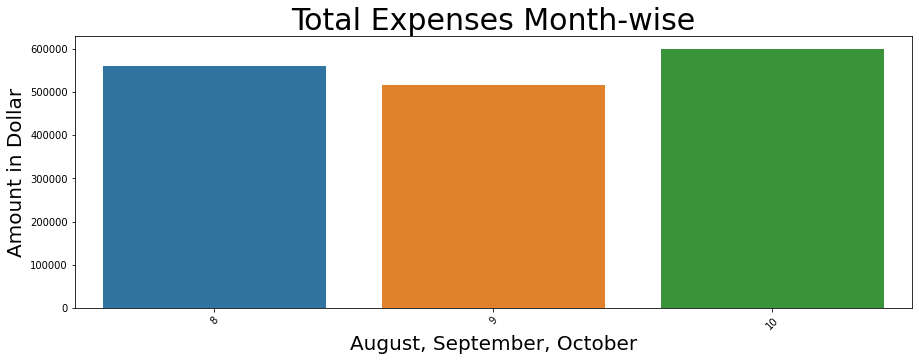

In [183]:
monthly_amount_spent = salary_data.groupby(['month'])['amount'].sum().reset_index()
monthly_amount_spent.sort_values(by = 'month')
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = monthly_amount_spent.month, y = monthly_amount_spent.amount, ax= ax)
plt.title('Total Expenses Month-wise',fontsize = 30,color='black')
plt.xlabel('August, September, October', fontsize = 20)
plt.ylabel('Amount in Dollar', fontsize =20)
plt.xticks(rotation = 45)
plt.show()

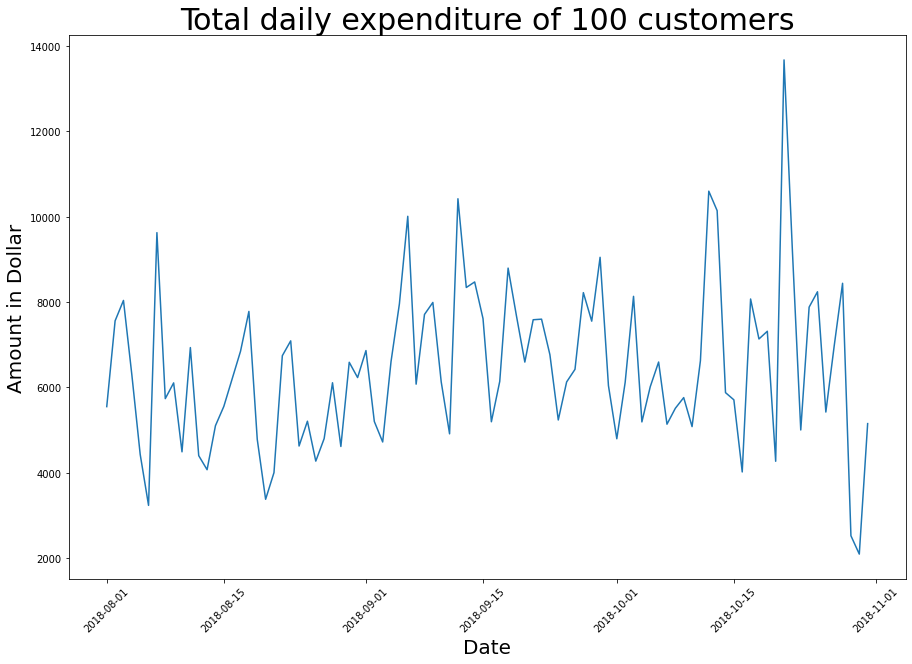

In [184]:
# Visual representation of total daily expenditure of 100 customers

daily_amount_spent = spending_data.groupby('date')['amount'].sum()

plt.figure(figsize=(15,10))
sns.lineplot(x = daily_amount_spent.index, y = daily_amount_spent.values)
plt.title('Total daily expenditure of 100 customers',fontsize = 30,color='black')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Amount in Dollar', fontsize =20)
plt.xticks(rotation = 45)
plt.show()

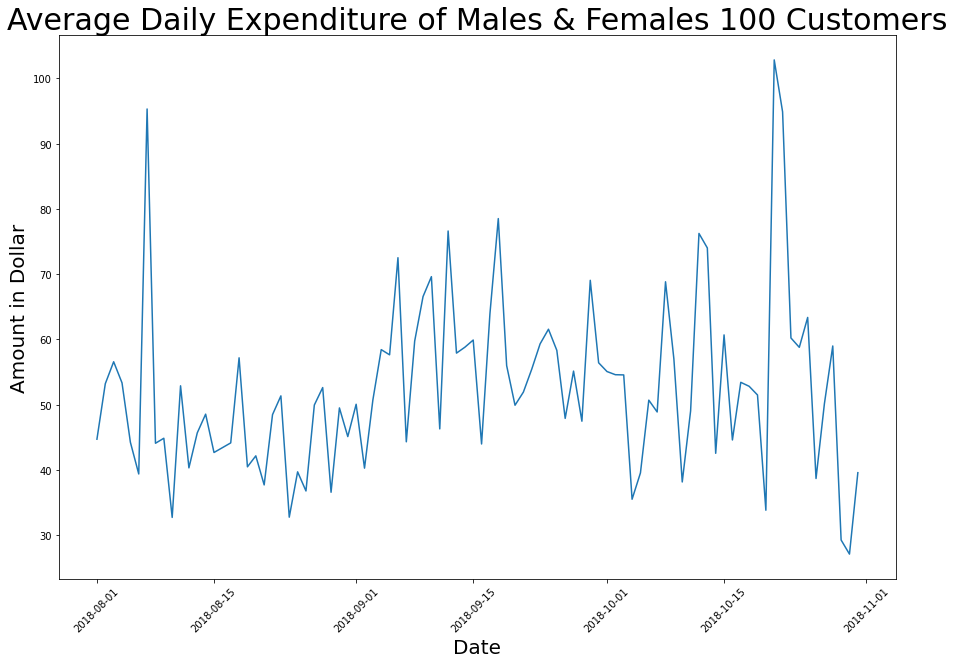

In [185]:
# Visual representation of average daily expenditure of 100 customers

daily_amount_spent = spending_data.groupby('date')['amount'].mean()

plt.figure(figsize=(15,10))
sns.lineplot(x = daily_amount_spent.index, y = daily_amount_spent.values)
plt.title('Average Daily Expenditure of Males & Females 100 Customers',fontsize = 30,color='black')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Amount in Dollar', fontsize =20)
plt.xticks(rotation = 45)
plt.show()

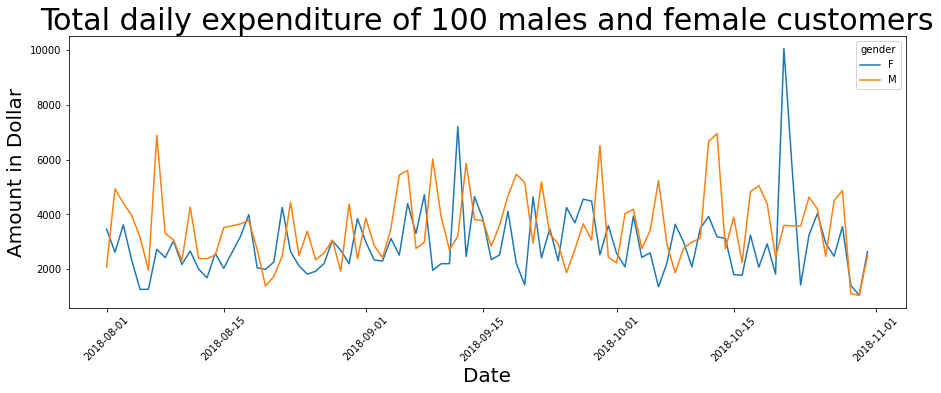

In [186]:
# Visual representation of total daily expenditure of 100 male and females customers

daily_amount_spent_gender = spending_data.groupby(['date','gender'], as_index = False)['amount'].sum()
daily_amount_spent_gender

plt.figure(figsize=(15,5))
sns.lineplot(x = 'date', y = 'amount', hue = 'gender', data = daily_amount_spent_gender)
plt.title('Total daily expenditure of 100 males and female customers',fontsize = 30,color='black')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Amount in Dollar', fontsize =20)
plt.xticks(rotation = 45)
plt.show()

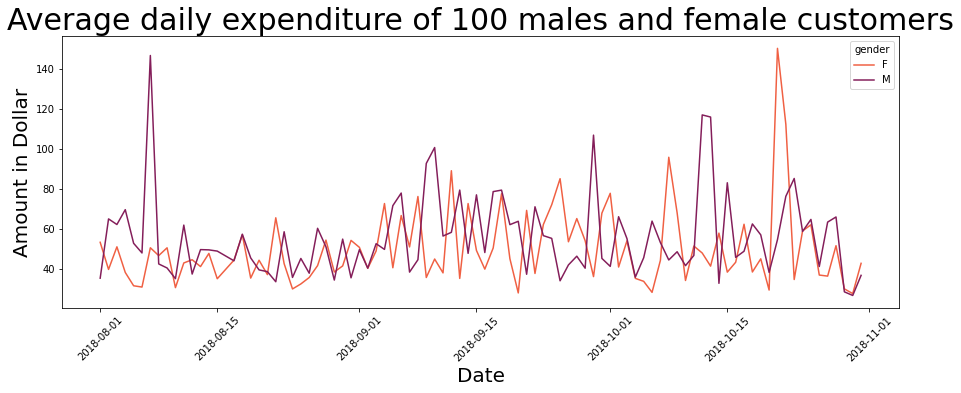

In [187]:
# Visual representation of average daily expenditure of 100 male and females customers

daily_amount_spent_gender = spending_data.groupby(['date','gender'], as_index = False)['amount'].mean()
palette = sns.color_palette('rocket_r', 2)
plt.figure(figsize=(15,5))
sns.lineplot(x = 'date', y = 'amount', hue = 'gender', data = daily_amount_spent_gender, palette = palette  )
plt.title('Average daily expenditure of 100 males and female customers',fontsize = 30,color='black')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Amount in Dollar', fontsize =20)
plt.xticks(rotation = 45)
plt.show()

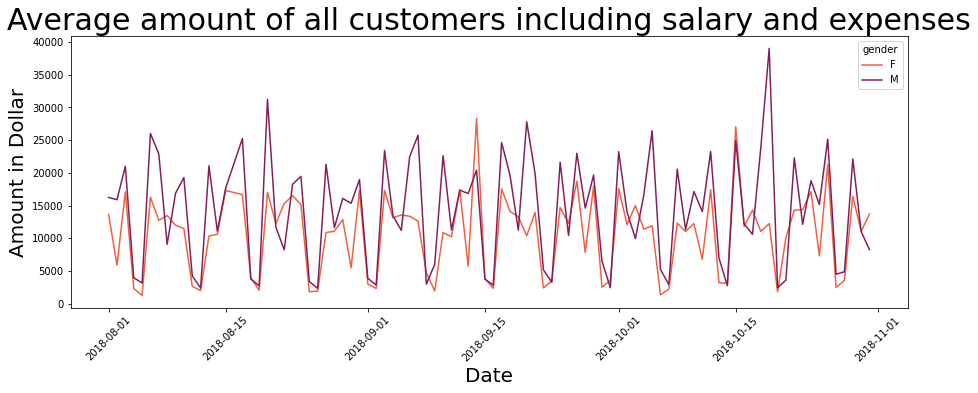

In [188]:
# Visual representation of total amount includes salary and expenses

daily_amount= data.groupby(['date','gender'], as_index = False)['amount'].sum()
palette = sns.color_palette('rocket_r', 2)
plt.figure(figsize=(15,5))
sns.lineplot(x = 'date', y = 'amount', hue = 'gender', data = daily_amount, palette = palette  )
plt.title('Average amount of all customers including salary and expenses',fontsize = 30,color='black')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Amount in Dollar', fontsize =20)
plt.xticks(rotation = 45)
plt.show()

8


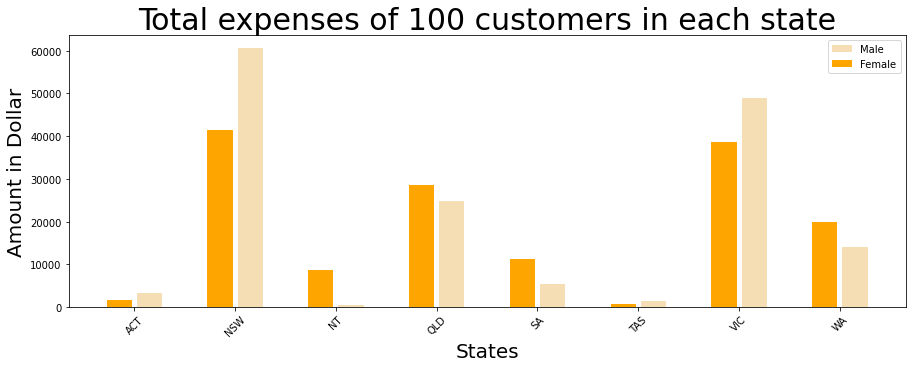

In [189]:
# visual Representation of daily total expenses of 100 customers in each state
data_M = spending_data[data.gender == 'M']
data_F = spending_data[data.gender == 'F']
daily_amount_spent_M = data_M.groupby(['merchant_state'])['amount'].sum().reset_index()
daily_amount_spent_F = data_F.groupby(['merchant_state'])['amount'].sum().reset_index()
print(len(daily_amount_spent_M))
# print(daily_amount_spent_F)
width = 0.25
x = np.arange(len(daily_amount_spent_M.merchant_state))
fig, ax = plt.subplots(figsize=(15,5))
ax.bar( x + 0.15, 'amount', data = daily_amount_spent_M, width=width, label = 'Male', color = 'wheat')
ax.bar( x - 0.15,  'amount', data = daily_amount_spent_F, width=width,  label = 'Female', color = 'orange')
plt.title('Total expenses of 100 customers in each state',fontsize = 30,color='black')
plt.xticks(np.arange(8), ['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA'])
plt.xlabel('States', fontsize = 20)
plt.ylabel('Amount in Dollar', fontsize =20)
plt.xticks(rotation = 45)
plt.legend()
plt.show()

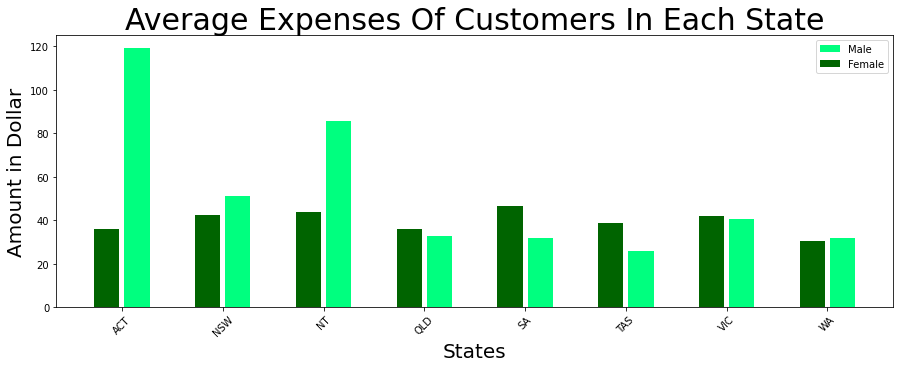

In [190]:
# Visual Representation Of Customer Expenses In Each State
data_M_spending = spending_data[data.gender == 'M']
data_F_spending = spending_data[data.gender == 'F']
daily_amount_spent_M = data_M_spending.groupby(['merchant_state'])['amount'].mean().reset_index()
daily_amount_spent_F = data_F_spending.groupby(['merchant_state'])['amount'].mean().reset_index()
# print(daily_amount_spent_M)
# print(daily_amount_spent_F)
width = 0.25
x = np.arange(len(daily_amount_spent_M.merchant_state))
fig, ax = plt.subplots(figsize=(15,5))
ax.bar( x + 0.15, 'amount', data = daily_amount_spent_M, width=width, label = 'Male', color = 'springgreen')
ax.bar( x - 0.15,  'amount', data = daily_amount_spent_F, width=width,  label = 'Female', color = 'darkgreen')
plt.title('Average Expenses Of Customers In Each State',fontsize = 30,color='black')
plt.xticks(np.arange(8), ['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA'])
plt.xlabel('States', fontsize = 20)
plt.ylabel('Amount in Dollar', fontsize =20)
plt.xticks(rotation = 45)
plt.legend()
plt.show()

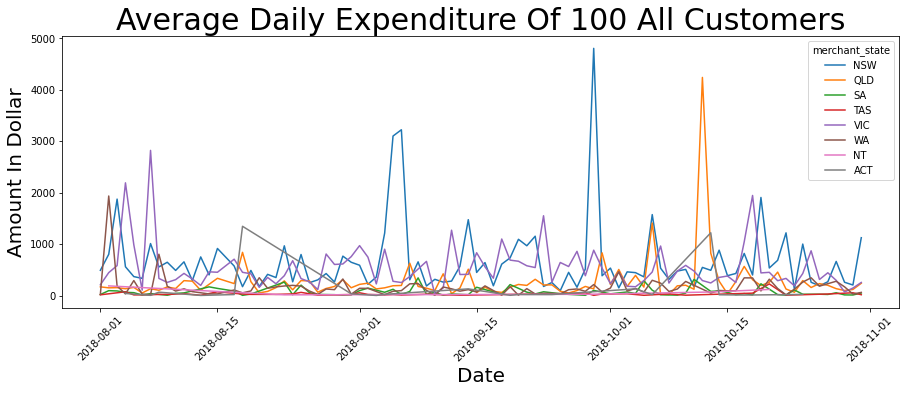

In [191]:
data3 = data_M.groupby(['date','merchant_state'], as_index = False)['amount'].sum()
data4 = data_F.groupby(['date','merchant_state'], as_index = False)['amount'].sum()

# print(data3.head(15))

fix, ax = plt.subplots(figsize=(15,5))
sns.lineplot(x = 'date', y = 'amount', hue = 'merchant_state', data = data3 )
plt.title("Average Daily Expenditure Of 100 All Customers",fontsize = 30,color='black')
plt.xlabel("Date", fontsize = 20)
plt.ylabel("Amount In Dollar", fontsize =20)
plt.xticks(rotation = 45)
plt.show()

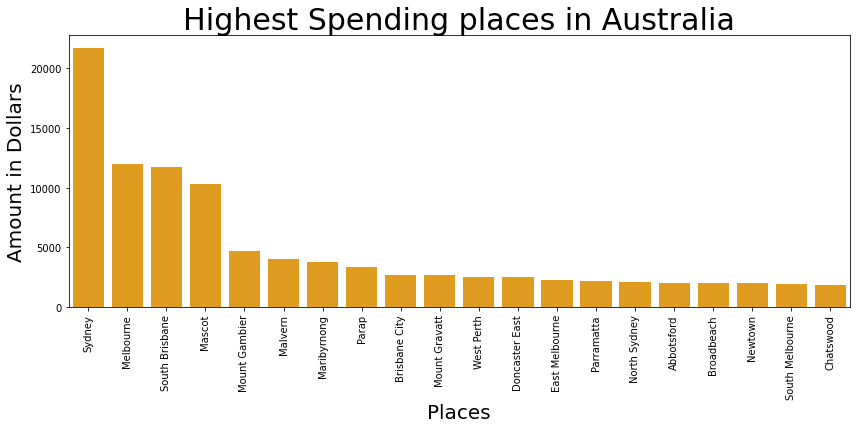

In [192]:
# Places Where People Spent Their Money Most

transaction_by_suburb = spending_data.groupby('merchant_suburb')["amount"].sum().reset_index().sort_values(by="amount", ascending = False)
# print(transaction_by_suburb[:10])
# x = sns.color_palette("Oranges", 8)
plt.figure(figsize=(14,5))
sns.barplot(x= transaction_by_suburb.merchant_suburb[:20], y= transaction_by_suburb.amount[:20], color = "orange")                             
plt.xlabel("Places", fontsize=20)
plt.ylabel("Amount in Dollars", fontsize=20)
plt.title("Highest Spending places in Australia", fontsize=30)
plt.xticks(rotation=90)
plt.show()

          account first_name    amount
0   ACC-819621312    Michele  12865.68
1  ACC-3317636250    Kenneth  12327.28
2  ACC-2673069055    Richard  12051.77
3  ACC-1598451071      Diana  12020.21
4   ACC-958000567     Sandra  11964.98


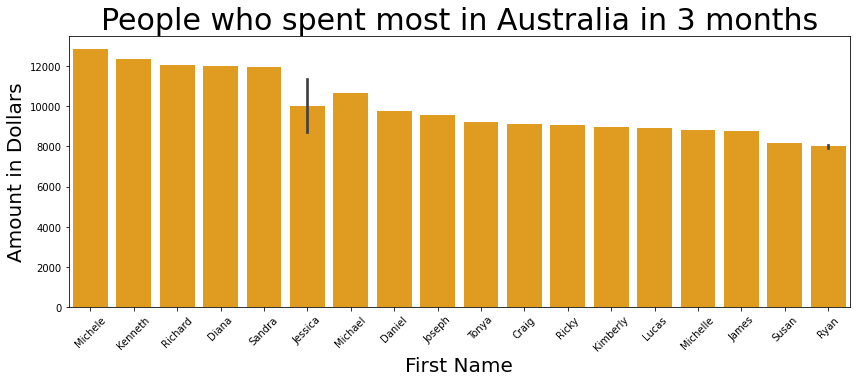

In [193]:
# People Who Spend The Most

transactions_by_people1 = spending_data.groupby(['account', 'first_name'])['amount'].sum().sort_values( ascending = False).reset_index()
print(transactions_by_people1.head(5))
plt.figure(figsize=(14,5))
sns.barplot(x= transactions_by_people1.first_name[:20], y= transactions_by_people1.amount[:20], color = 'orange')                              
plt.xlabel('First Name', fontsize=20)
plt.ylabel('Amount in Dollars', fontsize=20)
plt.title('People who spent most in Australia in 3 months', fontsize=30)
plt.xticks(rotation=45)
plt.show()

          account first_name    amount
0  ACC-1523339231        Tim  35343.92
1  ACC-1496451953      Ricky  33644.13
2  ACC-3317636250    Kenneth  33081.88
3  ACC-2231965366      Linda  31762.12
4   ACC-240804743    Kenneth  30837.10


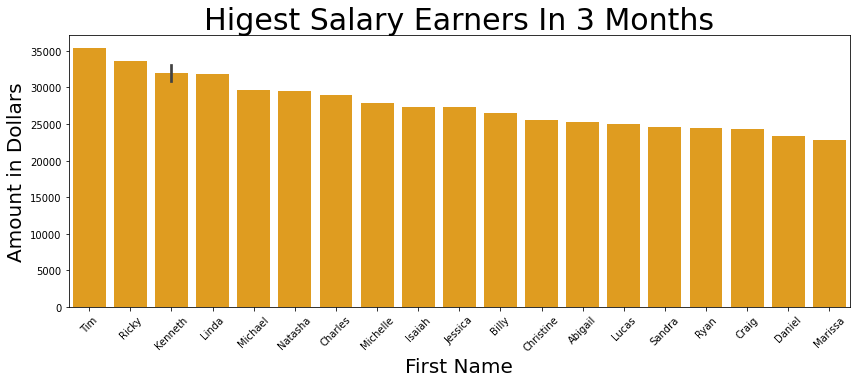

In [194]:
# Highest Salary Earners

transactions_by_people1 = salary_data.groupby(['account', 'first_name'])['amount'].sum().sort_values( ascending = False).reset_index()
print(transactions_by_people1.head(5))
plt.figure(figsize=(14,5))
sns.barplot(x= transactions_by_people1.first_name[:20], y= transactions_by_people1.amount[:20], color = 'orange')                              
plt.xlabel('First Name', fontsize=20)
plt.ylabel('Amount in Dollars', fontsize=20)
plt.title('Higest Salary Earners In 3 Months', fontsize=30)
plt.xticks(rotation=45)
plt.show()

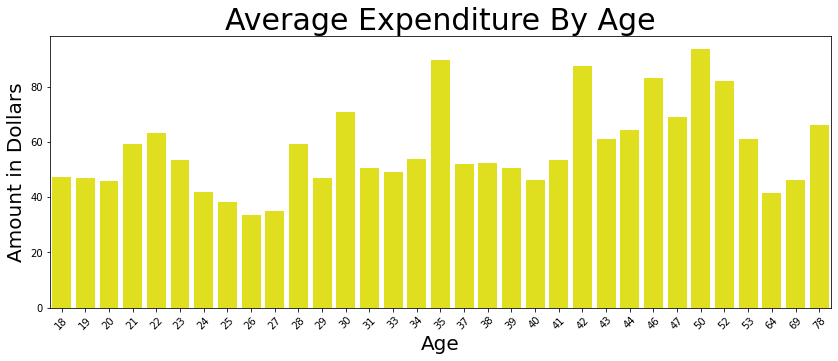

In [195]:
# Average Expenses By Age

transactions_by_age_group = spending_data.groupby(['age'], as_index = False)['amount'].mean().sort_values(by='amount', ascending = False)
transactions_by_age_group
plt.figure(figsize=(14,5))
sns.barplot(x= transactions_by_age_group.age, y= transactions_by_age_group.amount, color = 'yellow')                              
plt.xlabel('Age', fontsize=20)
plt.ylabel('Amount in Dollars', fontsize=20)
plt.title('Average Expenditure By Age', fontsize=30)
plt.xticks(rotation=45)
plt.show()

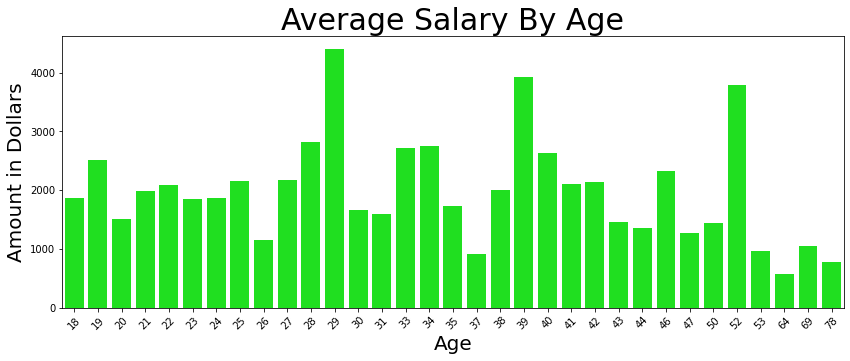

In [196]:
# Average Salary By Age

salary_by_age_group = salary_data.groupby(['age'], as_index = False)['amount'].mean().sort_values(by='amount', ascending = False)
plt.figure(figsize=(14,5))
sns.barplot(x= salary_by_age_group.age, y= salary_by_age_group.amount, color = 'lime')                              
plt.xlabel('Age', fontsize=20)
plt.ylabel('Amount in Dollars', fontsize=20)
plt.title('Average Salary By Age', fontsize=30)
plt.xticks(rotation=45)
plt.show()

## Wealth Analysis

          account   first_name        balance
0  ACC-2014856841      Patrick  263317.737513
1  ACC-3879258709      Natasha  197294.166681
2  ACC-2650850707        Brian  111650.206673
3  ACC-1523339231          Tim   65421.304599
4  ACC-1334819143  Christopher   62030.001313
5  ACC-4059612845     Jonathan   56808.290040
6   ACC-847145727      Michael   56356.510426
7   ACC-721712940       Andrew   54616.326905
8  ACC-1056639002      Michael   47672.913016
9  ACC-4281711154         Eric   38387.894098


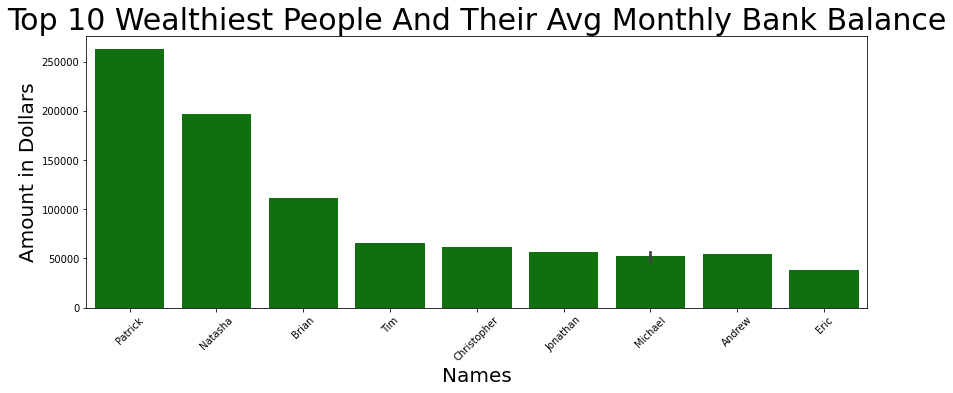

In [197]:
#Top 20 Wealthiest People

wealthy_people = data.groupby(['month', 'account', 'first_name'])['balance'].mean().reset_index().sort_values(by='balance', ascending = False)
wealthy_people1 = wealthy_people.groupby(['account', 'first_name'])['balance'].mean().sort_values(ascending = False).reset_index()
print(wealthy_people1.head(10))
plt.figure(figsize=(14,5))
sns.barplot(x= wealthy_people1.first_name[:10], y= wealthy_people1.balance[:10], color = 'green')                              
plt.xlabel('Names', fontsize=20)
plt.ylabel('Amount in Dollars', fontsize=20)
plt.title('Top 10 Wealthiest People And Their Avg Monthly Bank Balance', fontsize=30)
plt.xticks(rotation=45)
plt.show()

  merchant_state       balance
0            ACT  11044.641667
4             SA   7589.513333
6            VIC   6287.116667
7             WA   6238.463333
1            NSW   5627.876667
2             NT   5073.195000
5            TAS   4879.930000
3            QLD   3121.155000


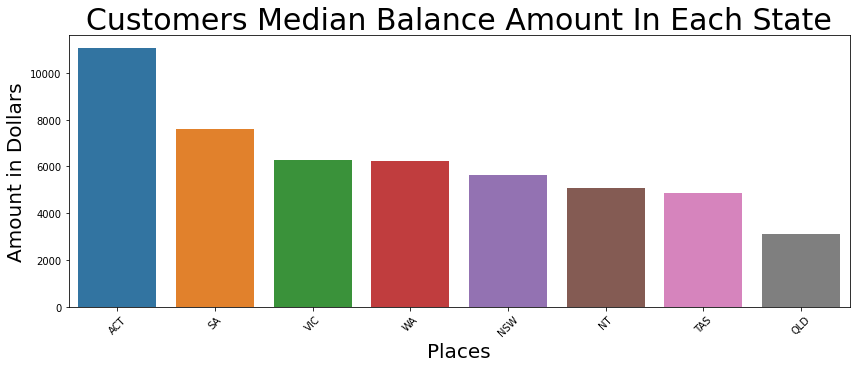

In [198]:
# wealth by states

wealthy_states = data.groupby(['merchant_state', 'month'])['balance'].median().reset_index()
wealthy_states1 = wealthy_states.groupby(['merchant_state'])['balance'].mean().reset_index().sort_values(by='balance', ascending = False)
print(wealthy_states1)
plt.figure(figsize=(14,5))
sns.barplot(x= wealthy_states1.merchant_state[:10], y= wealthy_states1.balance[:10])                              
plt.xlabel('Places', fontsize=20)
plt.ylabel('Amount in Dollars', fontsize=20)
plt.title('Customers Median Balance Amount In Each State', fontsize=30)
plt.xticks(rotation=45)
plt.show()

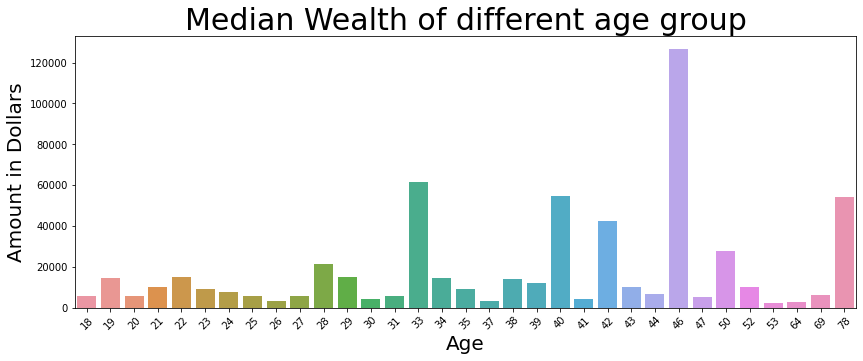

In [199]:
wealthy_age_group = data.groupby(['age',], as_index = False)['balance'].mean()
# .sort_values(by='balance', ascending = False)
# print(wealthy_age_group)
plt.figure(figsize=(14,5))
sns.barplot(x= wealthy_age_group.age, y= wealthy_age_group.balance)                              
plt.xlabel('Age', fontsize=20)
plt.ylabel('Amount in Dollars', fontsize=20)
plt.title('Median Wealth of different age group', fontsize=30)
plt.xticks(rotation=45)
plt.show()

In [200]:
# Age of Top 6 Wealthiest People
age_of_wealthy_people = data.groupby(["first_name", "age"]).balance.mean().reset_index().sort_values(by = "balance", ascending = False)
age_of_wealthy_people[:6]

,first_name,age,balance
71,Patrick,46,263753.766119
69,Natasha,40,198565.143775
8,Brian,42,111300.797619
94,Tim,40,65420.404231
12,Christopher,33,61491.350647
39,Jonathan,38,57566.579032


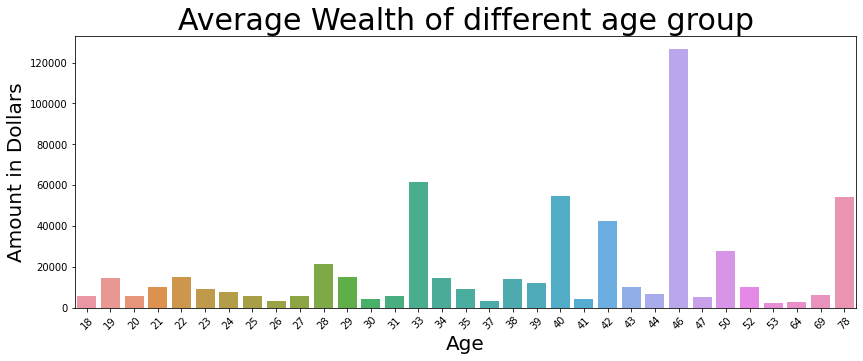

In [201]:
wealthy_age_group = data.groupby(['age'], as_index = False)['balance'].mean().sort_values(by='balance', ascending = False)
plt.figure(figsize=(14,5))
sns.barplot(x= wealthy_age_group.age, y= wealthy_age_group.balance)                              
plt.xlabel('Age', fontsize=20)
plt.ylabel('Amount in Dollars', fontsize=20)
plt.title('Average Wealth of different age group', fontsize=30)
plt.xticks(rotation=45)
plt.show()

In [202]:
# percentage distribution of wealth 

wealthy_people = data.groupby(['month', 'account', 'first_name'])['balance'].mean().reset_index().sort_values(by='balance', ascending = False)
wealthy_people1 = wealthy_people.groupby(['account', 'first_name'])['balance'].mean().sort_values(ascending = False).reset_index()
start = 1
end = 5000

for i in range(14):
    x = wealthy_people1[(wealthy_people1["balance"] > start) & (wealthy_people1["balance"] < end)]
    y = (x.account.value_counts().sum()/wealthy_people1.account.value_counts().sum())*100
    print(format(y,".2f"),"% people have $", start, "to", end, "in their bank account")
    start += 5000
    end += 5000
    print("_____________")

32.00 % people have $ 1 to 5000 in their bank account
_____________
30.00 % people have $ 5001 to 10000 in their bank account
_____________
18.00 % people have $ 10001 to 15000 in their bank account
_____________
3.00 % people have $ 15001 to 20000 in their bank account
_____________
2.00 % people have $ 20001 to 25000 in their bank account
_____________
1.00 % people have $ 25001 to 30000 in their bank account
_____________
1.00 % people have $ 30001 to 35000 in their bank account
_____________
4.00 % people have $ 35001 to 40000 in their bank account
_____________
0.00 % people have $ 40001 to 45000 in their bank account
_____________
1.00 % people have $ 45001 to 50000 in their bank account
_____________
1.00 % people have $ 50001 to 55000 in their bank account
_____________
2.00 % people have $ 55001 to 60000 in their bank account
_____________
1.00 % people have $ 60001 to 65000 in their bank account
_____________
1.00 % people have $ 65001 to 70000 in their bank account
_________

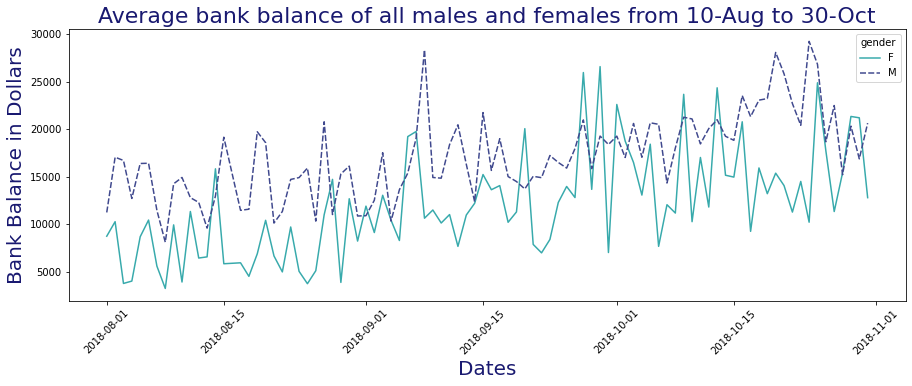

In [203]:
# Mean Wealth of Male and Females

x = data.groupby(['date', 'gender'], as_index = False).balance.mean()
palette = sns.color_palette('mako_r', 2)
plt.subplots(figsize=(15,5))
sns.lineplot(x.date, x.balance, hue = x.gender, style = x.gender, palette= palette)                            
plt.xlabel('Dates', fontsize=20, color = 'midnightblue')
plt.ylabel('Bank Balance in Dollars', fontsize=20, color = 'midnightblue')
plt.title('Average bank balance of all males and females from 10-Aug to 30-Oct', fontsize=22, color = 'midnightblue')
plt.xticks(rotation = 45)
plt.show()

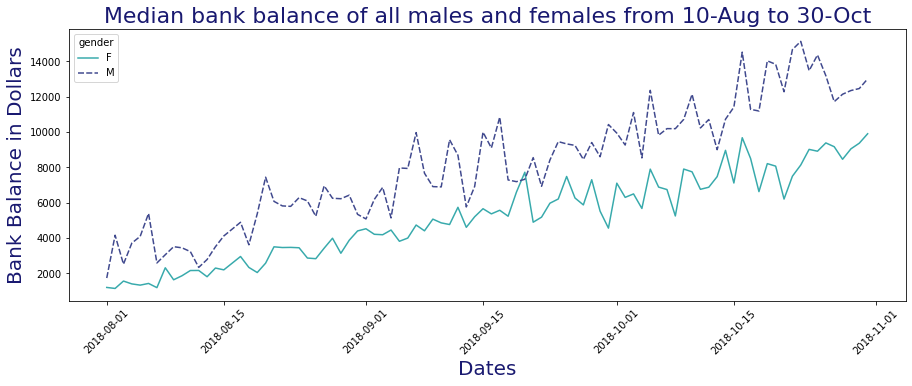

In [204]:
# Mean Wealth of Male and Females

x = data.groupby(['date', 'gender'], as_index = False).balance.median()
palette = sns.color_palette('mako_r', 2)
plt.subplots(figsize=(15,5))
sns.lineplot(x.date, x.balance, hue = x.gender, style = x.gender, palette= palette)                            
plt.xlabel('Dates', fontsize=20, color = 'midnightblue')
plt.ylabel('Bank Balance in Dollars', fontsize=20, color = 'midnightblue')
plt.title('Median bank balance of all males and females from 10-Aug to 30-Oct', fontsize=22, color = 'midnightblue')
plt.xticks(rotation = 45)
plt.show()

## Map of 100 Wealthiest Customers

In [205]:
m_1 = folium.Map(location=[-28.865143, 135.209900], tiles= 'OpenStreetMap' , zoom_start=4.2)
geo_data_wealthy = (data.groupby(['first_name', 'latitude', 'longitude'], as_index = False).balance.sum().sort_values(by='balance', ascending=False))[:100]
geo_data = gpd.GeoDataFrame(geo_data_wealthy, geometry=gpd.points_from_xy(geo_data_wealthy.longitude, geo_data_wealthy.latitude))
geo_data.crs = {'init' : 'epsg:4326'}
mc = MarkerCluster()
for idx, row in geo_data.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m_1)
m_1

In [206]:
# Map of all customers

m_5 = folium.Map(location=[-28.865143, 135.209900], tiles= 'OpenStreetMap' , zoom_start=4.2)
HeatMap(data=data[['latitude', 'longitude']], radius=10).add_to(m_5)
m_5